<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210530_students_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## データの生成

In [3]:
def rand(size, a=0, b=1):
    return (b - a) * np.random.random(size) + a

def generate_cluster(x_range=(0, 0.5), y_range=(0, 0.5), npoints=100, label=1):
    return np.array([
                  rand(npoints, *x_range), 
                  rand(npoints, *y_range)
            ]).T, np.ones(npoints) * label

npoints = 100
data1, data1_label = generate_cluster(x_range=(1.5, 2.0), y_range=(1.5, 2.0), npoints=npoints, label=1)
data2, data2_label = generate_cluster(x_range=(1.5, 2.0), y_range=(0.0, 0.5), npoints=npoints, label=2)
data3, data3_label = generate_cluster(x_range=(0.0, 0.5), y_range=(0.0, 0.5), npoints=npoints, label=1)
data4, data4_label = generate_cluster(x_range=(0.0, 0.5), y_range=(1.5, 2.0), npoints=npoints, label=2)

In [4]:
X = np.concatenate((data1, data3, data2, data4)) 
y = np.concatenate((data1_label, data3_label, data2_label, data4_label))
data_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y
})

## 色々なニューロンを実装するための雛形となるクラスを用意する

In [5]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [6]:
def check_activation(neuron, label):
    """各クラスタ中のデータに対してニューロンがどのように活動するかを可視化する関数
    """
    plt.title(f"activation of {label} neuron")
    plt.scatter(np.ones(npoints), neuron.forward(data1), label="data1")
    plt.scatter(np.ones(npoints)*1.1, neuron.forward(data2), label="data2")
    plt.scatter(np.ones(npoints)*1.2, neuron.forward(data3), label="data3")
    plt.scatter(np.ones(npoints)*1.3, neuron.forward(data4), label="data4")
    plt.xlabel("Cluster")
    plt.ylabel("Activation")
    plt.xticks([])
    plt.legend()

In [7]:
sample_neuron = Neuron(
    W=np.array([[0.1, 0.1]]),
    bias=0.5
)

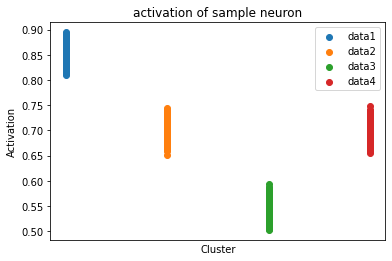

In [8]:
check_activation(sample_neuron, "sample")

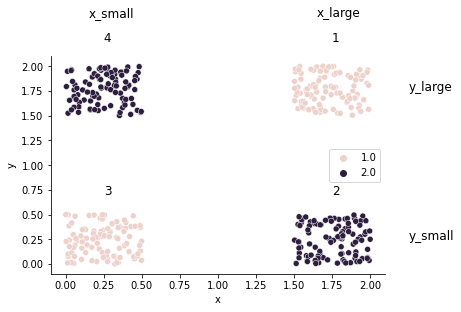

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", data=data_df, hue="label", ax=ax)
ax.text(1.75, 2.25, "1", fontsize=12)
ax.text(1.75, 0.7, "2", fontsize=12)
ax.text(0.25, 0.7, "3", fontsize=12)
ax.text(0.25, 2.25, "4", fontsize=12)
ax.text(1.65, 2.5, "x_large", fontsize=12)
ax.text(0.15, 2.5, "x_small", fontsize=12)
ax.text(2.25, 0.25, "y_small", fontsize=12)
ax.text(2.25, 1.75, "y_large", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(loc="center right")

# Ans1 

In [10]:
neuron1 = Neuron(
    W=np.array([[1.0, -1.0]]),
    bias = -1
)

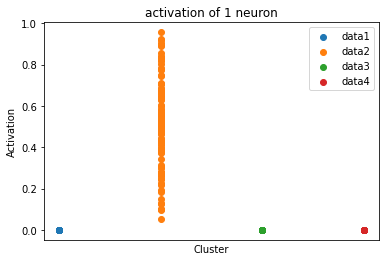

In [11]:
check_activation(neuron1, "1")

In [12]:
neuron2 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias = -1
)

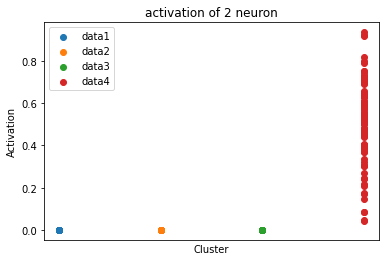

In [13]:
check_activation(neuron2, "2")

In [14]:
neuron3 = Neuron(
    W=np.array([[100.0, 100.0]]),
    bias = -1
)

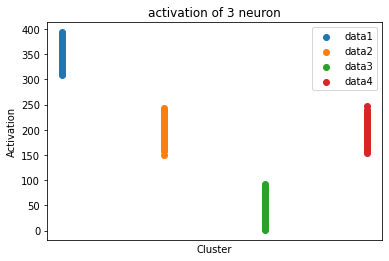

In [15]:
check_activation(neuron3, "3")

In [16]:
layer1 = [[neuron1, neuron2, neuron3]]

In [17]:
neuron4 = Neuron(
    W=np.array([[-1.0, 0.0, 1.0]]),
    bias=-1,
    layers =layer1
)

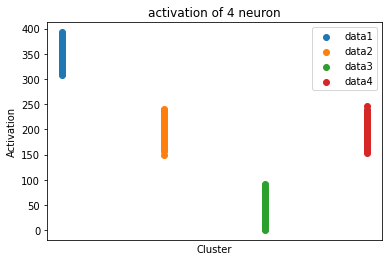

In [18]:
check_activation(neuron4, "4")

In [19]:
neuron5 = Neuron(
    W=np.array([[0.0, -1.0, 1.0]]),
    bias=-1,
    layers =layer1
)

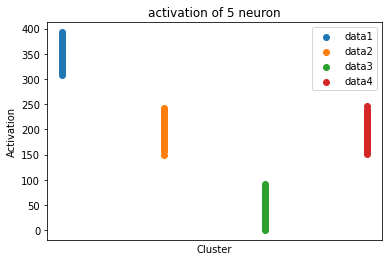

In [20]:
check_activation(neuron5, "5")

In [21]:
neuron6 = Neuron(
    W=np.array([[1.0, 1.0, 0.0]]),
    bias=-1,
    layers =layer1
)

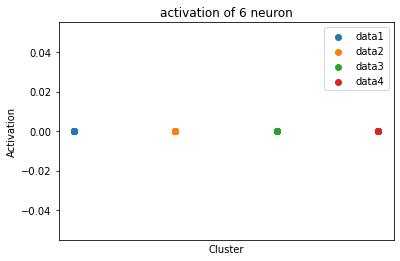

In [22]:
check_activation(neuron6, "6")

In [23]:
layer2 = [[neuron4, neuron5]]

In [24]:
neuron7 = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-1,
    layers =layer2
)

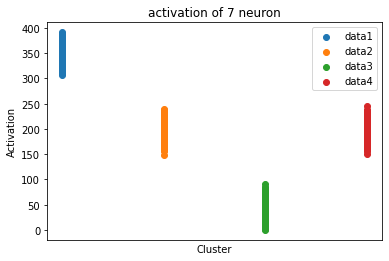

In [25]:
check_activation(neuron7, "7")

In [28]:
neuron7.forward(np.array([[0.5, 0.0], [2.0, 0.0]]))

array([ 47. , 196.5])

# Ans2

In [59]:
neuron1 = Neuron(
    W=np.array([[0.5, 1.0]]),
    bias=-0.5
)

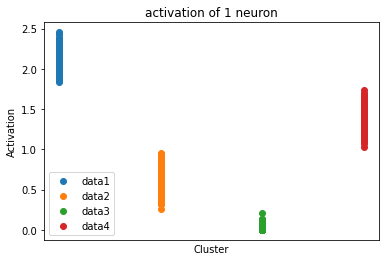

In [60]:
check_activation(neuron1, "1")

In [41]:
neuron2 = Neuron(
    W=np.array([[2.0, 1.5]]),
    bias=-0.5
)

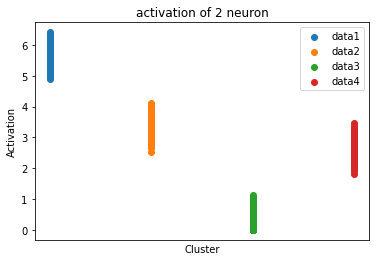

In [61]:
check_activation(neuron2, "2")

In [42]:
neuron3 = Neuron(
    W=np.array([[-1.0, -2.0]]),
    bias=-0.5
)

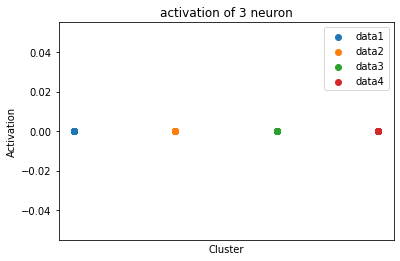

In [62]:
check_activation(neuron3, "3")

In [45]:
neuron4 = Neuron(
    W=np.array([[-2.0, -2.0]]),
    bias=-0.5
)

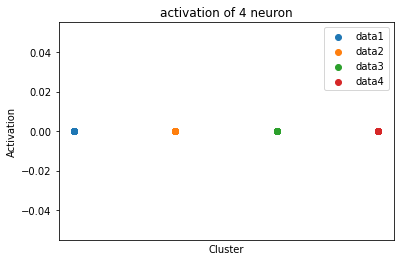

In [63]:
check_activation(neuron4, "4")

In [47]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [48]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 2.0]]),
    bias=-0.5,
    layers=layer1
)

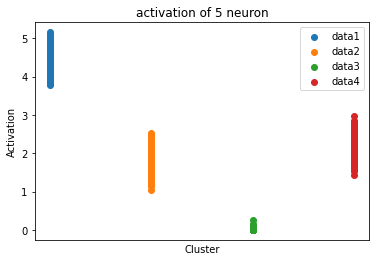

In [64]:
check_activation(neuron5, "5")

In [49]:
neuron6 = Neuron(
    W=np.array([[1.0, 0.5, 0.5, 1.5]]),
    bias=-0.5,
    layers=layer1
)

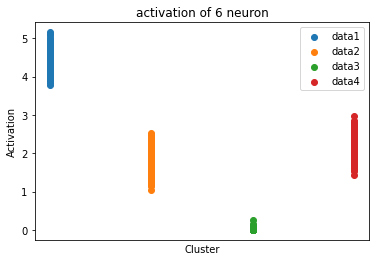

In [65]:
check_activation(neuron6, "6")

In [50]:
neuron7 = Neuron(
    W=np.array([[-1.0, 1.5, -1.0, -1.0]]),
    bias=-0.5,
    layers=layer1
)

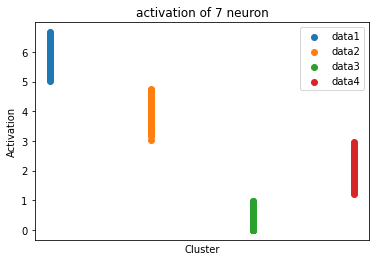

In [66]:
check_activation(neuron7, "7")

In [51]:
neuron8 = Neuron(
    W=np.array([[-1.5, -1.0, -1.5, 0.5]]),
    bias=-0.5,
    layers=layer1
)

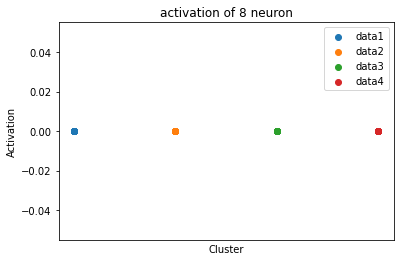

In [67]:
check_activation(neuron8, "8")

In [52]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [53]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, -1.0, 1.5]]),
    bias=-0.5,
    layers=layer2
)

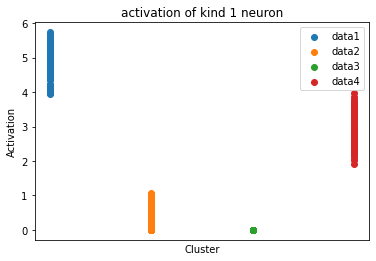

In [55]:
check_activation(neuron9, "kind 1")

In [57]:
neuron10 = Neuron(
    W=np.array([[-0.5, -0.5, -0.5, 2.0]]),
    bias=-0.5,
    layers=layer2
)

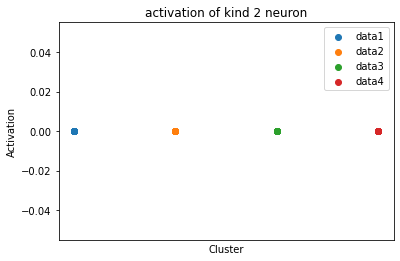

In [58]:
check_activation(neuron10, "kind 2")